# Exploratory Data Analysis: Gas Turbine Emision

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The data comes from the same power plant as the dataset


The explanations of sensor measurements and their brief statistics are given below. 

Variable (Abbr.) Unit Min Max Mean
- Ambient temperature (AT) C -6.23 37.10 17.71
- Ambient pressure (AP) mbar 985.85 1036.56 1013.07
- Ambient humidity (AH) (%) 24.08 100.20 77.87
- Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
- Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
- Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
- Turbine after temperature (TAT) C 511.04 550.61 546.16
- Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
- Turbine energy yield (TEY) MWH 100.02 179.50 133.51
- Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
- Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

Target Turbine energy yield TEY

In [1]:
import sys
print(sys.executable)

/home/cris/anaconda3/bin/python


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# data's 2011
gt_2011 = pd.read_csv('../data/gas_turbine_emision/gt_2011.csv' )
gt_2011['Year'] = 2011

# data's 2012
gt_2012 = pd.read_csv('../data/gas_turbine_emision/gt_2012.csv' )
gt_2012['Year'] = 2014

# data's 2013
gt_2013 = pd.read_csv('../data/gas_turbine_emision/gt_2013.csv' )
gt_2013['Year'] = 2013

# data's 2014
gt_2014 = pd.read_csv('../data/gas_turbine_emision/gt_2014.csv' )
gt_2014['Year'] = 2014

# data's 2015
gt_2015 = pd.read_csv('../data/gas_turbine_emision/gt_2015.csv' )
gt_2015['Year'] = 2015


gt = pd.concat([gt_2011, gt_2012, gt_2013, gt_2014, gt_2015], ignore_index=True)



gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,Year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011


In [3]:

import seaborn as sns


print("Seaborn version:", sns.__version__)

Seaborn version: 0.11.2


In [4]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
 11  Year    36733 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 3.4 MB


**Handle Missing Values**

In [5]:
gt.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
Year    0
dtype: int64

In [6]:
gt.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,36733.0,17.712726,7.447451,-6.234800,11.7810,17.8010,23.6650,37.1030
AP,36733.0,1013.070165,6.463346,985.850000,1008.8000,1012.6000,1017.0000,1036.6000
AH,36733.0,77.867015,14.461355,24.085000,68.1880,80.4700,89.3760,100.2000
AFDP,36733.0,3.925518,0.773936,2.087400,3.3556,3.9377,4.3769,7.6106
GTEP,36733.0,25.563801,4.195957,17.698000,23.1290,25.1040,29.0610,40.7160
TIT,36733.0,1081.428084,17.536373,1000.800000,1071.8000,1085.9000,1097.0000,1100.9000
TAT,36733.0,546.158517,6.842360,511.040000,544.7200,549.8800,550.0400,550.6100
TEY,36733.0,133.506404,15.618634,100.020000,124.4500,133.7300,144.0800,179.5000
CDP,36733.0,12.060525,1.088795,9.851800,11.4350,11.9650,12.8550,15.1590
CO,36733.0,2.372468,2.262672,0.000388,1.1824,1.7135,2.8429,44.1030


**Distributions**

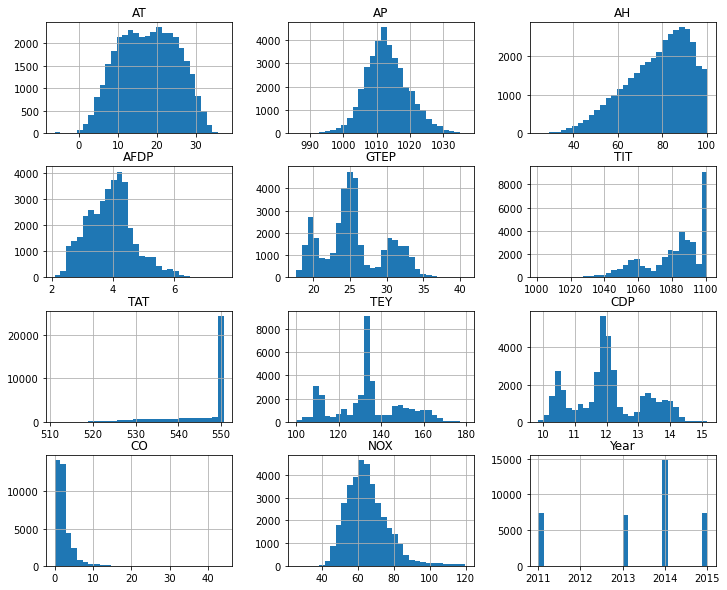

In [7]:
gt.hist(figsize=(12, 10), bins=30)
plt.show()

**Outliers**

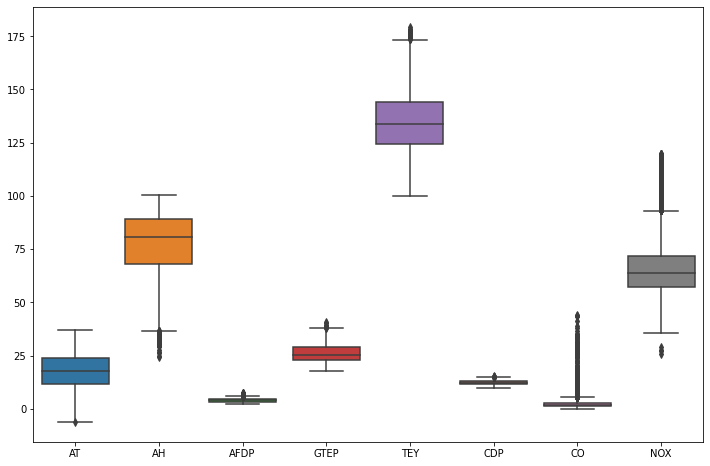

In [8]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=gt.drop(columns=['Year', 'AP', 'TAT', 'TIT']))
plt.show()

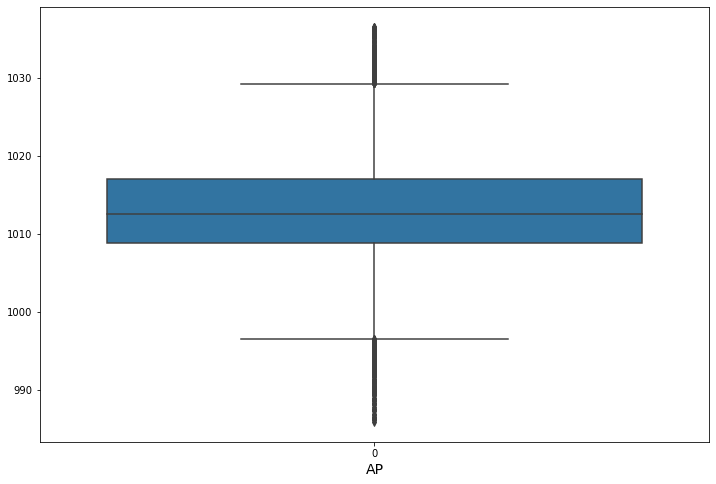

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=gt[ 'AP'])
plt.xlabel('AP', fontsize=14)

plt.show()

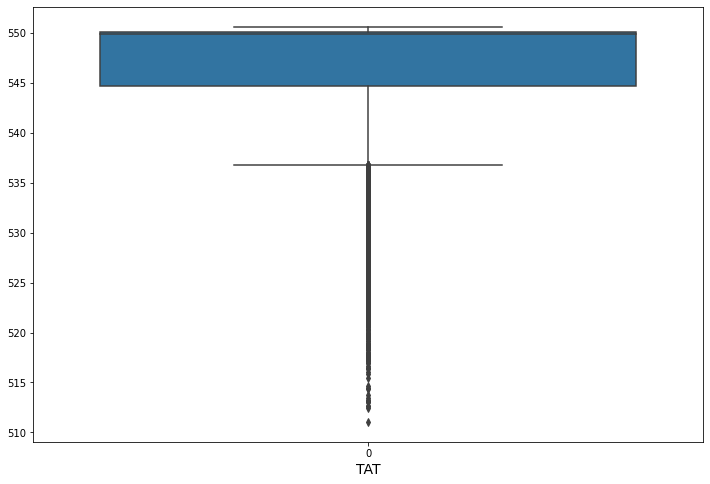

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=gt[ 'TAT'])
plt.xlabel('TAT', fontsize=14)

plt.show()

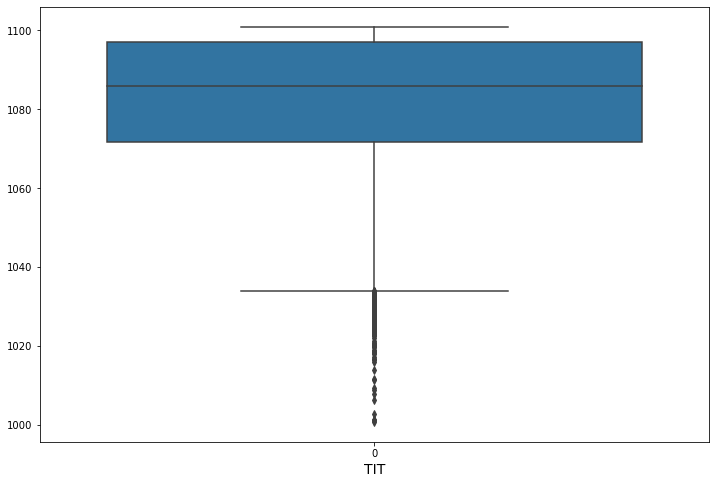

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=gt[ 'TIT'])
plt.xlabel('TIT', fontsize=14)

plt.show()

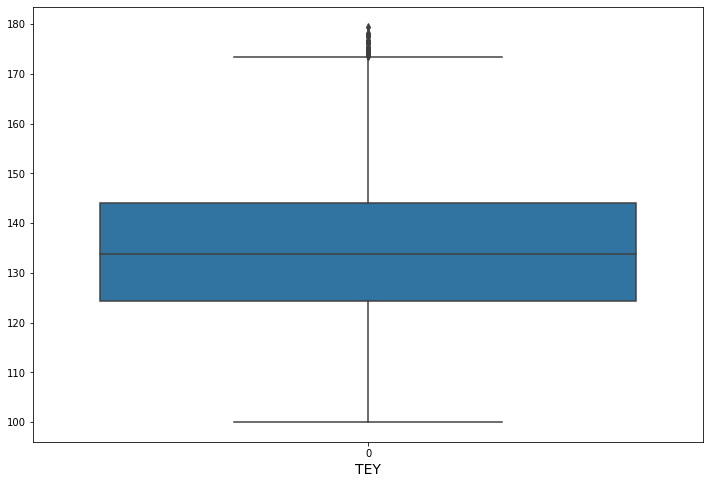

In [12]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=gt[ 'TEY'])
plt.xlabel('TEY', fontsize=14)

plt.show()

### Bivariate Analysis

**Scatter Plot**

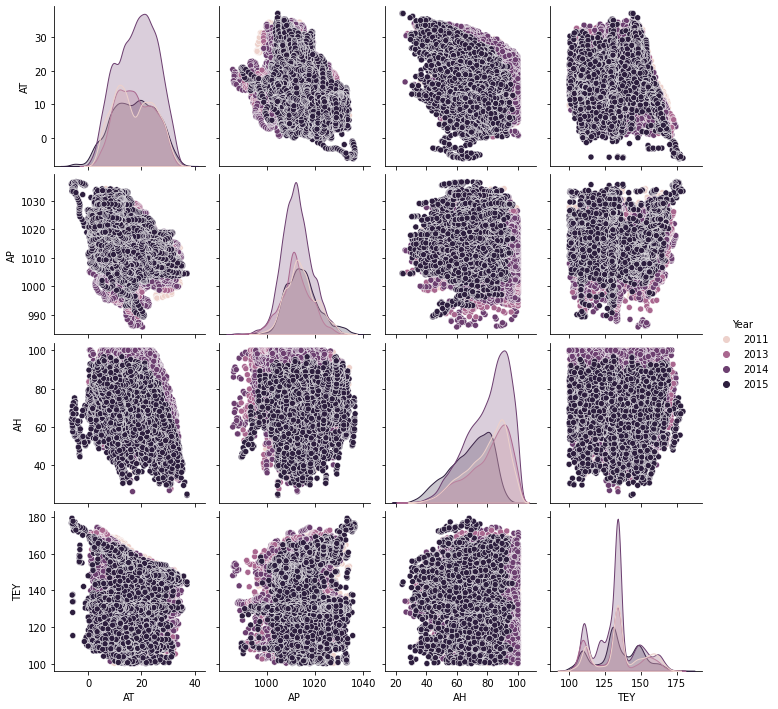

In [13]:
sns.pairplot(gt[['AT', 'AP', 'AH', 'TEY', 'Year']], hue='Year')
plt.show()

**Correlation Matrix**

In [24]:
gt['AT_AP_Ratio'] = gt['AT'] / gt['AP']
gt['TAT_TIT_Ratio'] = gt['TAT'] / gt['TIT']

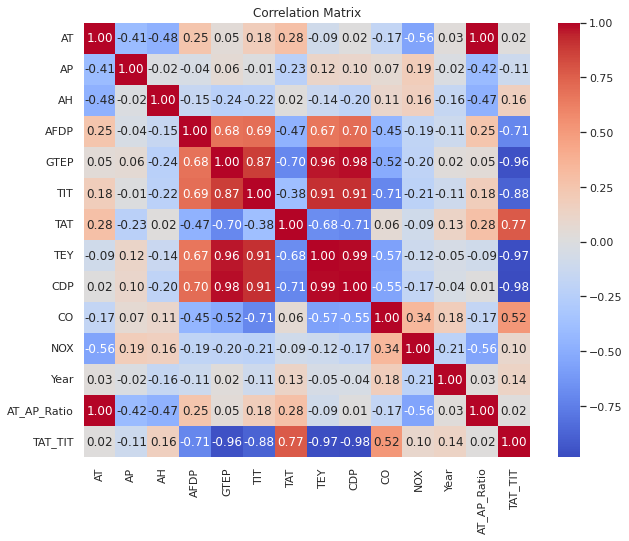

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(gt.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Notice that `TAT_TIT_Ratio` has a higher correlation with other festures, especially with `TEY`

## TEY Exploratory

**Trends in the average TEY over the years.**

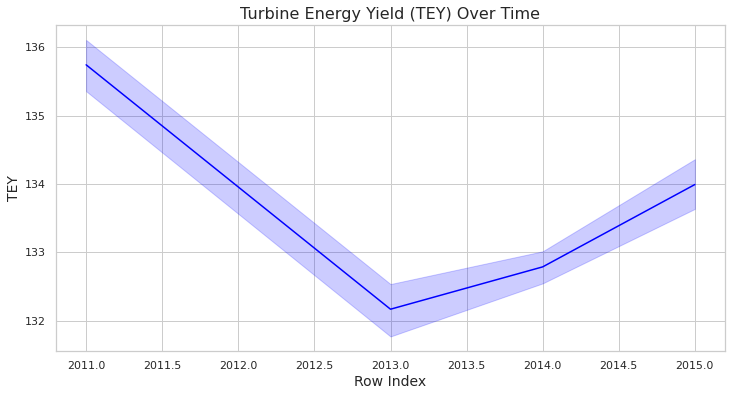

In [15]:
# Set the style
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=gt.Year, y=gt['TEY'], color='blue')
plt.title('Turbine Energy Yield (TEY) Over Time', fontsize=16)
plt.xlabel('Row Index', fontsize=14)
plt.ylabel('TEY', fontsize=14)
plt.show()

**Distribution**

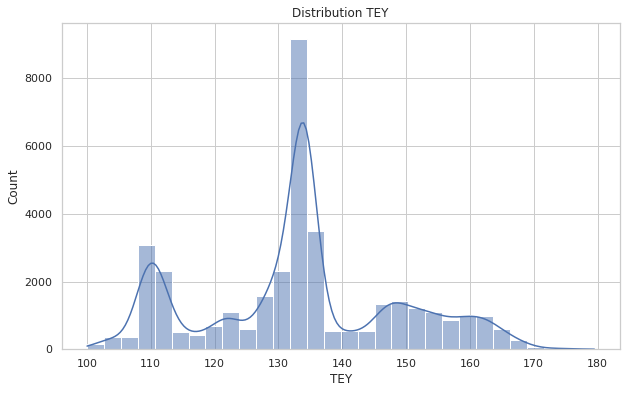

In [16]:
plt.figure(figsize=(10, 6))
plt.title('Distribution TEY')

sns.histplot(gt['TEY'], bins=30, kde=True)
plt.show()

**Detail about the distribution, including density.**

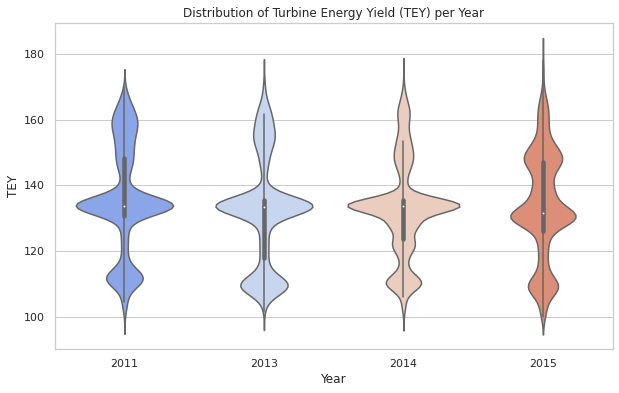

In [17]:
# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='TEY', data=gt, palette='coolwarm')
plt.title('Distribution of Turbine Energy Yield (TEY) per Year')
plt.xlabel('Year')
plt.ylabel('TEY')
plt.show()

**Calculate mean TEY per year**


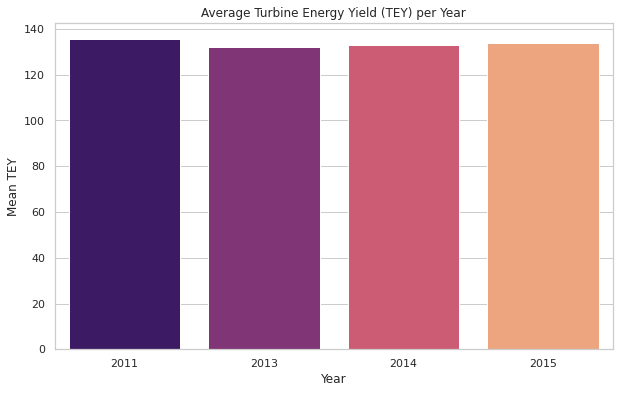

In [18]:
# Calculate mean TEY per year
mean_tey_per_year = gt.groupby('Year')['TEY'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='TEY', data=mean_tey_per_year, palette='magma')
plt.title('Average Turbine Energy Yield (TEY) per Year')
plt.xlabel('Year')
plt.ylabel('Mean TEY')
plt.show()

**Review if there is Linearity**

Analysis TEY with respect anothers variables. 

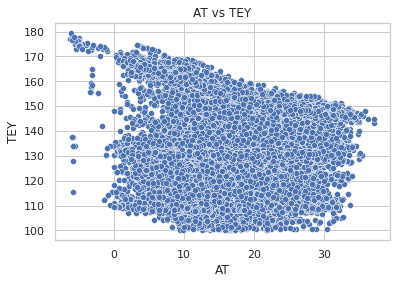

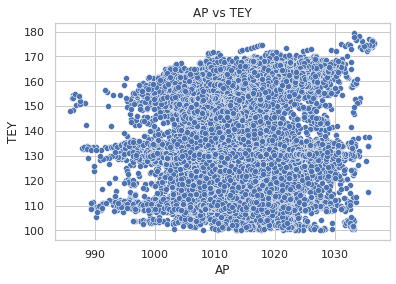

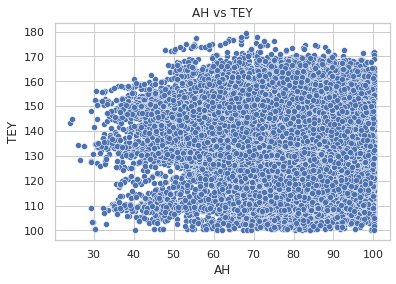

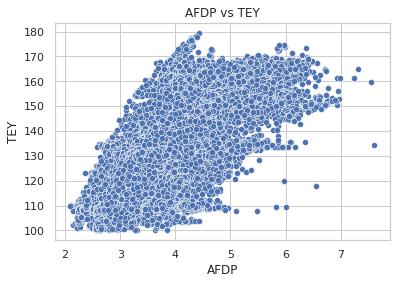

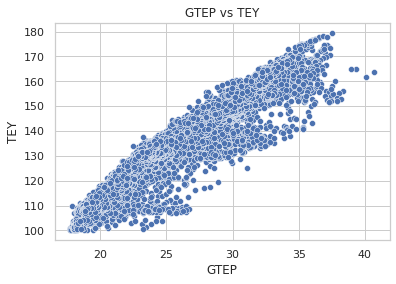

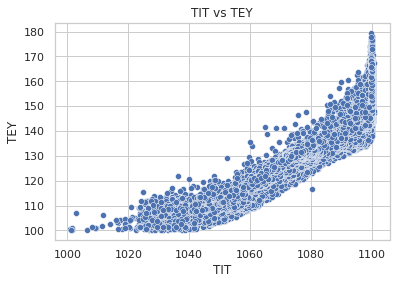

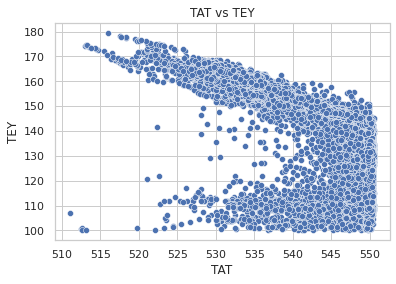

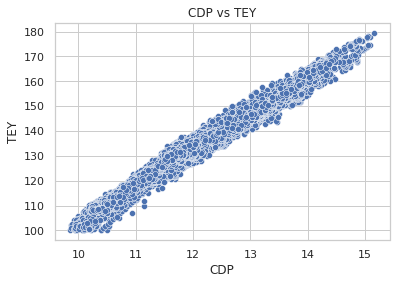

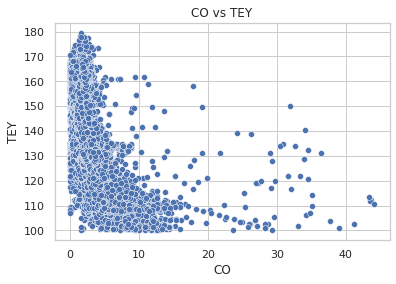

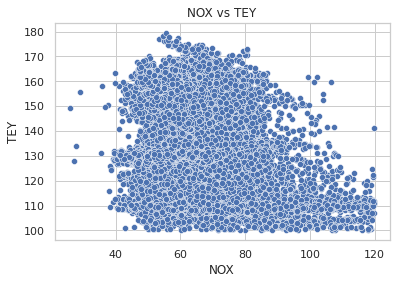

In [19]:


# Scatter plot for each feature vs TEY
for column in gt.columns:
    if column != 'TEY' and column != 'Year':  # Exclude target and categorical columns
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=gt[column], y=gt['TEY'])
        plt.title(f'{column} vs TEY')
        plt.xlabel(column)
        plt.ylabel('TEY')
        plt.show()

**Residual Plot**

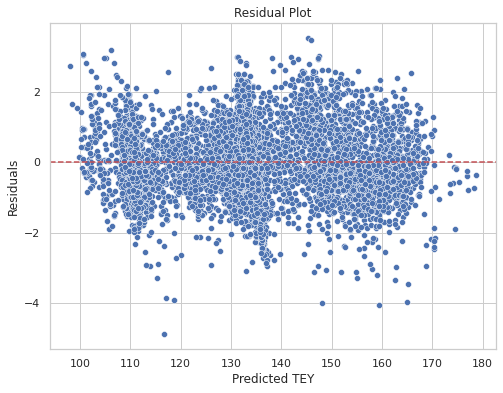

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data
X = gt.drop(columns=['TEY'])
y = gt['TEY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate residuals
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted TEY')
plt.ylabel('Residuals')
plt.show()

### Feature Engineer

In [21]:
gt['AT_AP_Ratio'] = gt['AT'] / gt['AP']

*There are some structured gaps and clusters, which suggest non-linearity in the data.*